# Practising Logistic Regression 

Using tutorial

In [16]:
import numpy as np

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [18]:
class LogisticRegression():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr=lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias=0
        for _ in range(self.n_iters):
            linear_pred = np.dot(X,self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            dw = (1/n_samples)*np.dot(X.T, (predictions - y))
            db = (1/n_samples)*np.sum(predictions - y)
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
    def predict(self, X):
        linear_pred = np.dot(X,self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred=[0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [20]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

In [21]:
regressor=LogisticRegression()

In [22]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\talkt\AppData\Local\Temp\ipykernel_37536\4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [23]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [24]:
acc = accuracy(y_pred, y_test)

In [25]:
print(acc)

0.8947368421052632


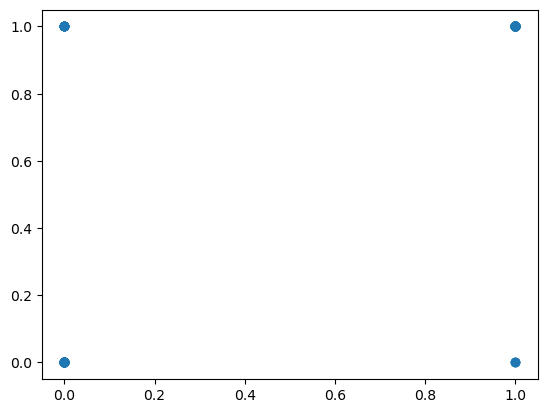

In [26]:
plt.scatter(y_pred, y_test)